In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

pd.set_option('display.max_columns', 1000)

In [ ]:
#merging files from https://files.data.gouv.fr/geo-dvf/latest/ extract data for 2017 to 2022 (1st semester)
df = pd.concat(
    map(pd.read_csv, ['69_2017.csv.gz', '69_2018.csv.gz', '69_2019.csv.gz','69_2020.csv.gz', '69_2021.csv.gz','69_2022.csv.gz']), ignore_index=True)



C:\Users\dunca\AppData\Local\Temp\ipykernel_17856\3951107241.py:2: DtypeWarning: Columns (14,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(
C:\Users\dunca\AppData\Local\Temp\ipykernel_17856\3951107241.py:2: DtypeWarning: Columns (14,16,17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(
C:\Users\dunca\AppData\Local\Temp\ipykernel_17856\3951107241.py:2: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(
C:\Users\dunca\AppData\Local\Temp\ipykernel_17856\3951107241.py:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(
C:\Users\dunca\AppData\Local\Temp\ipykernel_17856\3951107241.py:2: DtypeWarning: Columns (14,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(


In [ ]:
df.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2018-921649,2018-01-05,1,Vente,140000.0,2.0,NaN,RUE DE LA REPUBLIQUE,0700,69580.0,69292,Sathonay-Camp,69,NaN,NaN,69292000AE0012,NaN,NaN,1.0,95.33,5.0,23.94,8.0,NaN,NaN,NaN,NaN,NaN,3,4.0,Local industriel. commercial ou assimilé,120.0,0.0,NaN,NaN,NaN,NaN,NaN,4.873564,45.825154
1,2018-921650,2018-01-06,1,Vente,85605.0,19.0,NaN,RUE DE LA FRATERNELLE,2895,69009.0,69389,Lyon 9e Arrondissement,69,NaN,NaN,69389000BV0111,NaN,NaN,30.0,17.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,17.0,1.0,NaN,NaN,NaN,NaN,NaN,4.804004,45.768488
2,2018-921651,2018-01-03,1,Vente,10000.0,65.0,NaN,RUE DE ST CYR,6295,69009.0,69389,Lyon 9e Arrondissement,69,NaN,NaN,69389000AX0092,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.806677,45.786710
3,2018-921652,2018-01-03,1,Vente,232800.0,3.0,NaN,RUE BURDEAU,1155,69001.0,69381,Lyon 1er Arrondissement,69,NaN,NaN,69381000AK0046,NaN,NaN,9.0,41.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,40.0,2.0,NaN,NaN,NaN,NaN,NaN,4.831404,45.770318
4,2018-921653,2018-01-03,1,Vente,162000.0,17.0,T,RUE GAMBETTA,0110,69270.0,69088,Fontaines-sur-Saône,69,NaN,NaN,69088000AB0508,NaN,NaN,52.0,70.72,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,71.0,3.0,NaN,NaN,NaN,NaN,NaN,4.843466,45.836873


In [ ]:
# filter the data for only Lyon (les 9 arrondissements)
mask = (df["code_postal"] < 69010) & (df["code_postal"] > 69000) 
dataset = df.loc[mask,:]


In [ ]:
# filter for only "appartements" and "maisons"  and "Vente" and "Vente en l'état futur d'achèvement"
mask2 = ((dataset['type_local'] == 'Appartement') | (dataset['type_local'] == 'Maison'))
dataset = dataset.loc[mask2,:]
mask3 = ((dataset['nature_mutation'] == 'Vente') | (dataset['nature_mutation'] == "Vente en l'état futur d'achèvement"))
dataset = dataset.loc[mask3,:]

In [ ]:
dataset.describe()

,numero_disposition,valeur_fonciere,adresse_numero,code_postal,code_commune,code_departement,ancien_code_commune,lot1_surface_carrez,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
count,51672.000000,5.150000e+04,51045.000000,51672.000000,51672.000000,51672.0,0.0,22643.000000,8160.000000,3095.000000,657.000000,776.000000,127.000000,280.000000,31.000000,51672.000000,51672.000000,51670.000000,51670.000000,5362.000000,51297.000000,51297.000000
mean,1.029978,7.982905e+05,64.905671,69005.430697,69385.430697,69.0,NaN,63.885021,70.817150,53.584491,86.455023,53.622423,94.055669,45.217857,97.807742,1.390637,1.974861,64.117457,2.683182,648.320216,4.841245,45.756417
std,0.544591,2.164925e+06,333.187444,2.475949,2.475949,0.0,NaN,68.157788,29.332364,92.342946,45.003425,99.446873,53.861812,53.048626,62.211623,0.833604,0.156550,34.521843,1.332155,1362.958588,0.024637,0.015898
min,1.000000,1.000000e+00,1.000000,69001.000000,69381.000000,69.0,NaN,1.400000,1.270000,2.000000,1.000000,2.000000,5.750000,3.000000,0.600000,0.000000,1.000000,4.000000,0.000000,15.000000,4.773162,45.722048
25%,1.000000,1.800000e+05,11.000000,69003.000000,69383.000000,69.0,NaN,38.605000,52.027500,9.000000,53.290000,9.000000,57.875000,9.000000,59.310000,1.000000,2.000000,41.000000,2.000000,226.000000,4.827172,45.744794
50%,1.000000,2.781250e+05,28.000000,69006.000000,69386.000000,69.0,NaN,59.030000,68.190000,35.000000,78.780000,34.000000,86.900000,31.500000,76.750000,1.000000,2.000000,61.000000,3.000000,367.000000,4.841824,45.754860
75%,1.000000,4.600000e+05,69.000000,69008.000000,69388.000000,69.0,NaN,78.530000,85.202500,59.000000,111.800000,60.250000,119.165000,54.500000,139.195000,2.000000,2.000000,80.000000,4.000000,585.000000,4.860654,45.768614
max,25.000000,2.862929e+07,9020.000000,69009.000000,69389.000000,69.0,NaN,1766.840000,319.700000,1413.000000,345.550000,1414.000000,280.100000,554.000000,212.980000,11.000000,2.000000,407.000000,21.000000,21996.000000,4.897842,45.805778


In [ ]:
#  check the columns with missing value
print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])


Percentage of missing values: 


id_mutation                       0.000000
date_mutation                     0.000000
numero_disposition                0.000000
nature_mutation                   0.000000
valeur_fonciere                   0.332869
adresse_numero                    1.213423
adresse_suffixe                  94.718610
adresse_nom_voie                  0.000000
adresse_code_voie                 0.000000
code_postal                       0.000000
code_commune                      0.000000
nom_commune                       0.000000
code_departement                  0.000000
ancien_code_commune             100.000000
ancien_nom_commune              100.000000
id_parcelle                       0.000000
ancien_id_parcelle              100.000000
numero_volume                   100.000000
lot1_numero                      10.392476
lot1_surface_carrez              56.179362
lot2_numero                      58.962301
lot2_surface_carrez              84.208082
lot3_numero                      94.010296
lot3_surfac

In [ ]:

# drop columns with 50% or more with zero value
to_drop = ['code_departement', 'ancien_code_commune', 'code_commune', 'adresse_suffixe', 'ancien_code_commune', 'ancien_nom_commune', 'ancien_id_parcelle', 'numero_volume', 'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez', 'lot4_numero', 'lot4_surface_carrez', 'lot5_numero', 'lot5_surface_carrez', 'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale', 'nature_culture_speciale', 'lot1_surface_carrez', 'lot2_numero']
variables_to_keep = [col for col in dataset.columns if col not in to_drop]
print("Dropping columns: ", to_drop)
#create a new data
data = dataset.loc[:,variables_to_keep]
print('...Done!')

Dropping columns:  ['code_departement', 'ancien_code_commune', 'code_commune', 'adresse_suffixe', 'ancien_code_commune', 'ancien_nom_commune', 'ancien_id_parcelle', 'numero_volume', 'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez', 'lot4_numero', 'lot4_surface_carrez', 'lot5_numero', 'lot5_surface_carrez', 'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale', 'nature_culture_speciale', 'lot1_surface_carrez', 'lot2_numero']
...Done!


In [ ]:
#drop missing value for the target
data.dropna(subset=['valeur_fonciere'], inplace=True)

In [ ]:
# check the size of data
len(data)

51500

In [ ]:
# create new columns for year of sale 
data["year"] = data["date_mutation"].apply(lambda x : int(x.split("-")[0]))

In [ ]:
# create new columns for month of sale
data["month"] = data["date_mutation"].apply(lambda x : int(x.split("-")[1]))

In [ ]:
# create a list for trimester and add new column for merging to another file
trim_list = []
print(len(data))
for i in range(len(data)):
    month = data.iloc[i]["month"]
    year = data.iloc[i]["year"]
    if month <= 3:
        trim_list.append(f"{year}-T1")
    elif month <= 6 and month > 3:
        trim_list.append(f"{year}-T2")
    elif month <= 9 and month > 6:
        trim_list.append(f"{year}-T3")
    elif month > 9:
        trim_list.append(f"{year}-T4")
    
data['trim'] = trim_list

51500


In [ ]:
# reset index
data.reset_index(inplace=True)

In [ ]:
# import file indice prix
ind_prix =pd.read_excel('indice_prix.xlsx')


'2022-T2'

In [ ]:
# add the data from index_prix to a new column
ind_prix_list = []
for i in range(len(data)):
    for j in range(len(ind_prix)):
        if data.loc[i,'trim'] == ind_prix.loc[j,'Unnamed: 0']:
            if data.loc[i, 'type_local'] == 'Appartement':
                ind_prix_list.append(ind_prix.loc[j,'Appartement'])
            elif data.loc[i, 'type_local'] == 'Maison':
                ind_prix_list.append(ind_prix.loc[j, 'Maison'])
        

data['index_prix'] = ind_prix_list

In [ ]:
# add columns "prix_au_m2"
data['prix_au_m2'] = data['valeur_fonciere']/data['surface_reelle_bati']

In [ ]:
# reset index data by the new column for outliers
data = data.sort_values('prix_au_m2',ascending=False)
data.head()


,index,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,nom_commune,id_parcelle,lot1_numero,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,year,month,trim,index_prix,prix_au_m2
10026,24429,2018-934464,2018-10-29,1,Vente en l'état futur d'achèvement,6196748.0,71.0,RUE MONTAGNY,4850,69008.0,Lyon 8e Arrondissement,69388000CK0097,45.0,1,2.0,Appartement,4.0,1.0,NaN,4.850547,45.733555,2018,10,2018-T4,3.4,1.549187e+06
14588,94779,2019-999862,2019-09-17,1,Vente,26138036.0,7.0,RUE DE LA REPUBLIQUE,6005,69001.0,Lyon 1er Arrondissement,69381000AS0064,NaN,0,2.0,Appartement,20.0,1.0,525.0,4.836266,45.766464,2019,9,2019-T3,4.0,1.306902e+06
26384,187992,2020-956734,2020-12-21,1,Vente,25025000.0,18.0,RUE DE L ARBRE SEC,0425,69001.0,Lyon 1er Arrondissement,69381000AS0078,NaN,0,2.0,Appartement,27.0,1.0,982.0,4.835651,45.766366,2020,12,2020-T4,6.4,9.268519e+05
17591,102152,2019-1003860,2019-04-01,1,Vente,23332406.0,4.0,RUE ETIENNE RICHERAND,2595,69003.0,Lyon 3e Arrondissement,69383000EI0081,1.0,1,2.0,Appartement,26.0,1.0,NaN,4.866821,45.763442,2019,4,2019-T2,4.3,8.974002e+05
14388,94209,2019-999560,2019-09-17,1,Vente,17473294.0,24.0,RUE NEUVE,5005,69002.0,Lyon 2e Arrondissement,69382000AC0045,NaN,0,2.0,Appartement,21.0,1.0,138.0,4.836262,45.765118,2019,9,2019-T3,4.0,8.320616e+05


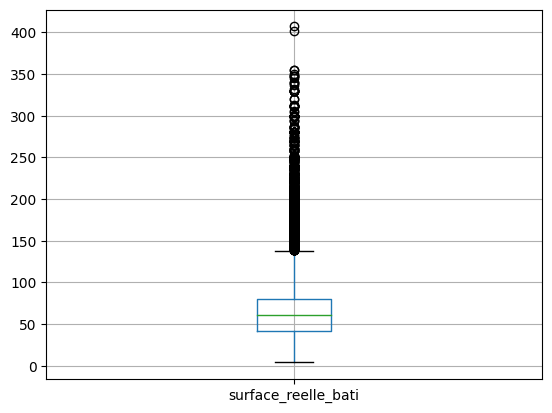

In [ ]:
# boxplot "surface_reelle_bati"
boxplot = data.boxplot(column=['surface_reelle_bati'])

In [ ]:
# drop columns with 50% or more with zero value
to_drop = ['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation', 'adresse_code_voie', 'code_postal', 'lot1_numero', 'nombre_lots', 'code_type_local', 'surface_terrain', 'prix_au_m2']
variables_to_keep = [col for col in data.columns if col not in to_drop]
print("Dropping columns: ", to_drop)
#on crée une nouvelle variable pour conserver les données en cas de besoin
data = data.loc[:,variables_to_keep]
print('...Done!')

Dropping columns:  ['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation', 'adresse_code_voie', 'code_postal', 'lot1_numero', 'nombre_lots', 'code_type_local', 'surface_terrain', 'prix_au_m2']
...Done!


In [ ]:
# drop rows with lat and lon with NA
mask8 = (data["latitude"].isna()) 
data = data[~mask8]
len(data)

51125

In [ ]:
# to csv for adding information with scrapping
data.to_csv('immo_lyon17_22_last.csv')

In [ ]:
# to csv for streamlit
data.to_csv('immo_lyon17_22Epuré.csv')